In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/uber-fares-dataset/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [4]:
def valid_coords(row):
    return (
        -74.5 <= row['pickup_longitude'] <= -73.5 and
        40.5 <= row['pickup_latitude'] <= 41.0 and
        -74.5 <= row['dropoff_longitude'] <= -73.5 and
        40.5 <= row['dropoff_latitude'] <= 41.0
    )

df['valid_coords'] = df.apply(valid_coords, axis=1)

print(f"Invalid coordinate rows: {len(df) - df['valid_coords'].sum()}")

Invalid coordinate rows: 4340


In [5]:
df_clean = df.dropna(subset=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
df_clean = df_clean[df_clean['valid_coords']]

# Drop the helper column
df_clean = df_clean.drop(columns=['valid_coords'])


In [6]:
df_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df_clean = df[df['valid_coords']].copy()
df_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,valid_coords
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,True
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,True
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,True
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,True
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,True


In [8]:
df_clean.drop(columns=['valid_coords'], inplace=True)

In [9]:
df_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


now only trips lefts which are inside the valid range of NYC

In [10]:
print(df_clean.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    R = 6371  # Earth radius in kilometers
    return R * c


In [12]:
df_clean['trip_distance_km'] = haversine(
    df_clean['pickup_longitude'], 
    df_clean['pickup_latitude'], 
    df_clean['dropoff_longitude'], 
    df_clean['dropoff_latitude']
)

# Convert to miles
df_clean['trip_distance_miles'] = df_clean['trip_distance_km'] * 0.621371


In [13]:
df_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km,trip_distance_miles
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,1.045968
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,1.527075
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,3.129459
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,1.032522
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2.780915


In [14]:
df_clean = df_clean.drop(columns=[ 'trip_distance_miles'])
print(df_clean)

        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225 

Longitude and latitude can also be dropped as trip distance is already calculated

In [15]:
df3=pd.read_csv("/kaggle/input/weather/weather (1).csv")
df3.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),snowfall (cm),precipitation (mm),pressure_msl (hPa),weather_code (wmo code),apparent_temperature (°C),wind_speed_10m (km/h),snow_depth (m),cloud_cover (%)
0,2009-06-01T00:00,20.5,42,7.3,0.0,0.0,0.0,1009.0,0,17.5,15.5,0.0,3
1,2009-06-01T01:00,18.2,40,4.2,0.0,0.0,0.0,1011.1,0,14.0,19.1,0.0,0
2,2009-06-01T02:00,16.4,38,2.1,0.0,0.0,0.0,1012.8,0,11.9,18.5,0.0,0
3,2009-06-01T03:00,15.0,40,1.5,0.0,0.0,0.0,1014.2,0,10.4,18.1,0.0,0
4,2009-06-01T04:00,13.8,43,1.4,0.0,0.0,0.0,1015.5,0,9.0,19.6,0.0,1


In [16]:
print(df3.isnull().sum())

time                         0
temperature_2m (°C)          0
relative_humidity_2m (%)     0
dew_point_2m (°C)            0
rain (mm)                    0
snowfall (cm)                0
precipitation (mm)           0
pressure_msl (hPa)           0
weather_code (wmo code)      0
apparent_temperature (°C)    0
wind_speed_10m (km/h)        0
snow_depth (m)               0
cloud_cover (%)              0
dtype: int64


In [17]:

# Ensure both columns are datetime types
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])
df3['time'] = pd.to_datetime(df3['time'])

# Localize df3['time'] since it's tz-naive
if df3['time'].dt.tz is None:
    df3['time'] = df3['time'].dt.tz_localize('UTC')
else:
    df3['time'] = df3['time'].dt.tz_convert('UTC')

# If df_clean['pickup_datetime'] is already tz-aware, convert to UTC
if df_clean['pickup_datetime'].dt.tz is not None:
    df_clean['pickup_datetime'] = df_clean['pickup_datetime'].dt.tz_convert('UTC')
else:
    df_clean['pickup_datetime'] = df_clean['pickup_datetime'].dt.tz_localize('UTC')

# Optional: floor to the hour to align the times
df_clean['pickup_datetime'] = df_clean['pickup_datetime'].dt.floor('h')
df3['time'] = df3['time'].dt.floor('h')

# Merge on the datetime columns
df_merged = pd.merge(df_clean, df3, left_on='pickup_datetime', right_on='time', how='left')

print(df_merged)


        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
195655    42598914   2012-10-28 10:49:00.00000053          3.0   
195656    16382965    2014-03-14 01:09:00.0000008          7.5   
195657    27804658   2009-06-29 00:42:00.00000078         30.9   
195658    20259894    2015-05-20 14:56:25.0000004         14.5   
195659    11951496   2010-05-15 04:08:00.00000076         14.1   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:00:00+00:00        -73.999817        40.738354   
1      2009-07-17 20:00:00+00:00        -73.994355        40.7282

In [18]:
df_merged.isnull().sum()

Unnamed: 0                       0
key                              0
fare_amount                      0
pickup_datetime                  0
pickup_longitude                 0
pickup_latitude                  0
dropoff_longitude                0
dropoff_latitude                 0
passenger_count                  0
trip_distance_km                 0
time                         12589
temperature_2m (°C)          12589
relative_humidity_2m (%)     12589
dew_point_2m (°C)            12589
rain (mm)                    12589
snowfall (cm)                12589
precipitation (mm)           12589
pressure_msl (hPa)           12589
weather_code (wmo code)      12589
apparent_temperature (°C)    12589
wind_speed_10m (km/h)        12589
snow_depth (m)               12589
cloud_cover (%)              12589
dtype: int64

In [19]:
df_merged = pd.merge(
    df_clean, df3,
    left_on='pickup_datetime',
    right_on='time',
    how='left'  # keep all trips initially
)

# Drop all rows with any missing values
df_merged = df_merged.dropna()

# Optionally reset index after dropping
df_merged = df_merged.reset_index(drop=True)

print(df_merged)


        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
183066    42598914   2012-10-28 10:49:00.00000053          3.0   
183067    16382965    2014-03-14 01:09:00.0000008          7.5   
183068    27804658   2009-06-29 00:42:00.00000078         30.9   
183069    20259894    2015-05-20 14:56:25.0000004         14.5   
183070    11951496   2010-05-15 04:08:00.00000076         14.1   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:00:00+00:00        -73.999817        40.738354   
1      2009-07-17 20:00:00+00:00        -73.994355        40.7282

In [20]:
df_merged.isnull().sum()

Unnamed: 0                   0
key                          0
fare_amount                  0
pickup_datetime              0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            0
dropoff_latitude             0
passenger_count              0
trip_distance_km             0
time                         0
temperature_2m (°C)          0
relative_humidity_2m (%)     0
dew_point_2m (°C)            0
rain (mm)                    0
snowfall (cm)                0
precipitation (mm)           0
pressure_msl (hPa)           0
weather_code (wmo code)      0
apparent_temperature (°C)    0
wind_speed_10m (km/h)        0
snow_depth (m)               0
cloud_cover (%)              0
dtype: int64

In [21]:
def classify_weather(row):
    if row['snowfall (cm)'] > 0.1:
        return 'snowy'
    elif row['rain (mm)'] > 0.5:
        return 'rainy'
    elif row['cloud_cover (%)'] > 50:
        return 'cloudy'
    else:
        return 'sunny'

df_merged['weather_status'] = df_merged.apply(classify_weather, axis=1)
df_merged.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km,...,rain (mm),snowfall (cm),precipitation (mm),pressure_msl (hPa),weather_code (wmo code),apparent_temperature (°C),wind_speed_10m (km/h),snow_depth (m),cloud_cover (%),weather_status
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,...,0.0,0.0,0.0,1021.2,0.0,24.2,9.9,0.0,1.0,sunny
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,...,0.0,0.0,0.0,1008.6,3.0,28.7,11.2,0.0,100.0,cloudy
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,...,0.0,0.0,0.0,1017.3,3.0,28.5,9.2,0.0,95.0,cloudy
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,...,0.0,0.0,0.0,1006.6,3.0,21.0,7.4,0.0,81.0,cloudy
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,...,0.0,0.0,0.0,1012.1,0.0,26.3,16.7,0.0,4.0,sunny


In [22]:

features = [
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'dew_point_2m (°C)',
    'rain (mm)',
    'snowfall (cm)',
    'precipitation (mm)',
    'pressure_msl (hPa)',
    'weather_code (wmo code)',
    'apparent_temperature (°C)',
    'wind_speed_10m (km/h)',
    'snow_depth (m)',
    'cloud_cover (%)',
    'time' ,
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude'
]

# Drop them from the merged DataFrame
df_merged.drop(columns=features, inplace=True)


df_merged.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count,trip_distance_km,weather_status
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00+00:00,1,1.683323,sunny
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00+00:00,1,2.457590,cloudy
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00+00:00,1,5.036377,cloudy
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00+00:00,3,1.661683,cloudy
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00+00:00,5,4.475450,sunny


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


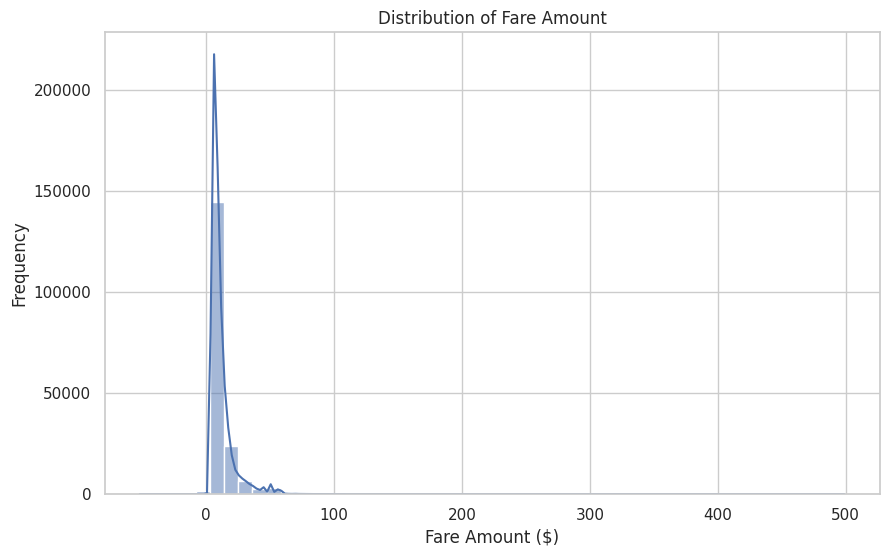

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()


Distribution of Fare amount

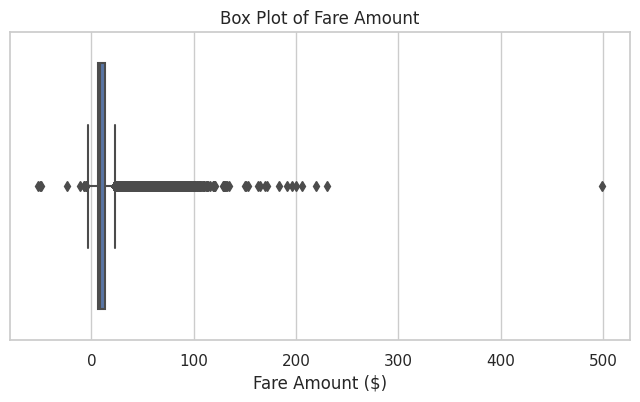

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_merged['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.show()


In [34]:
import seaborn as sns


# Drop any 'Unnamed' columns (like 'Unnamed: 0')
df_merged = df_merged.loc[:, ~df_merged.columns.str.contains('^Unnamed')]

# Encode 'final_status' (categorical) to numeric values
status_mapping = {'sunny': 0, 'cloudy': 1, 'rainy': 2, 'snowy': 3}
df_merged['weather_status_code'] = df_merged['weather_status'].map(status_mapping)

# Select numeric features (including encoded weather status)
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64'])

# Compute correlation with 'fare_amount'
correlation_with_fare = numeric_cols.corr()['fare_amount'].sort_values(ascending=False)

# Display results
print("Correlation of features with fare_amount:\n")
print(correlation_with_fare)




Correlation of features with fare_amount:

fare_amount            1.000000
trip_distance_km       0.858625
passenger_count        0.011619
weather_status_code   -0.009186
Name: fare_amount, dtype: float64


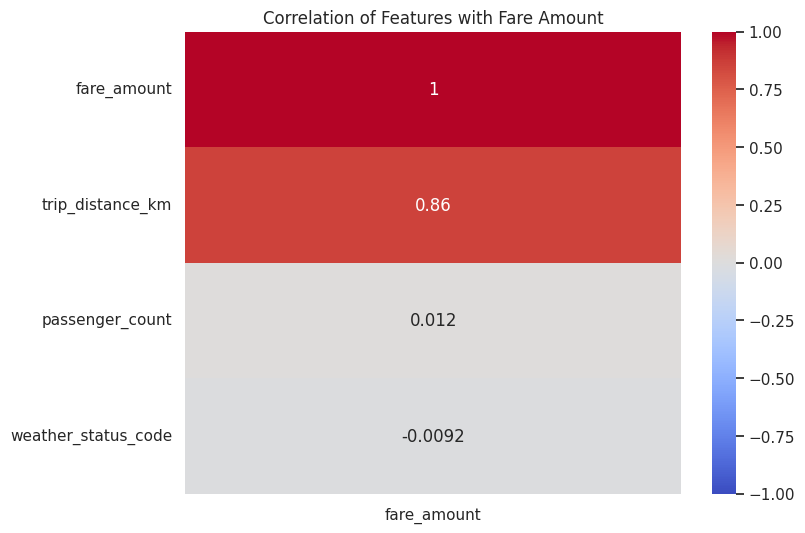

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr()[['fare_amount']].sort_values(by='fare_amount', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Fare Amount')
plt.show()

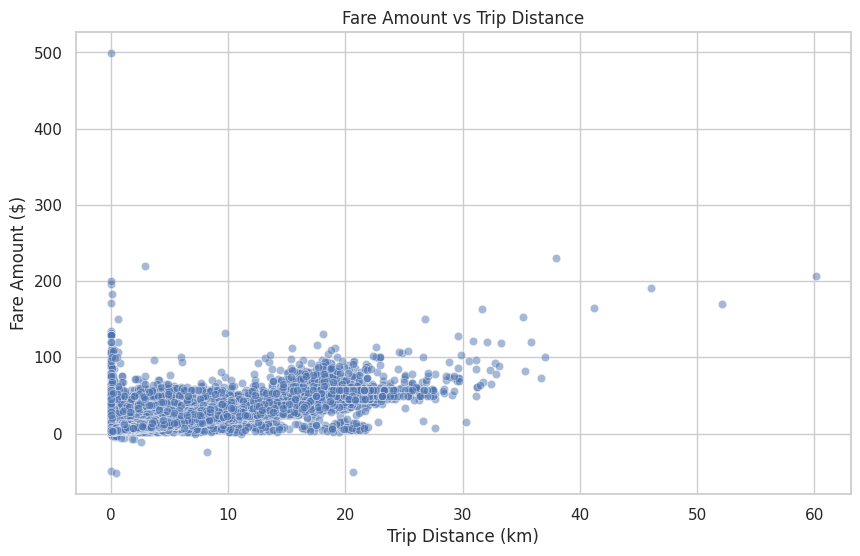

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='trip_distance_km', y='fare_amount', alpha=0.5)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()


## The most important feature is trip distance

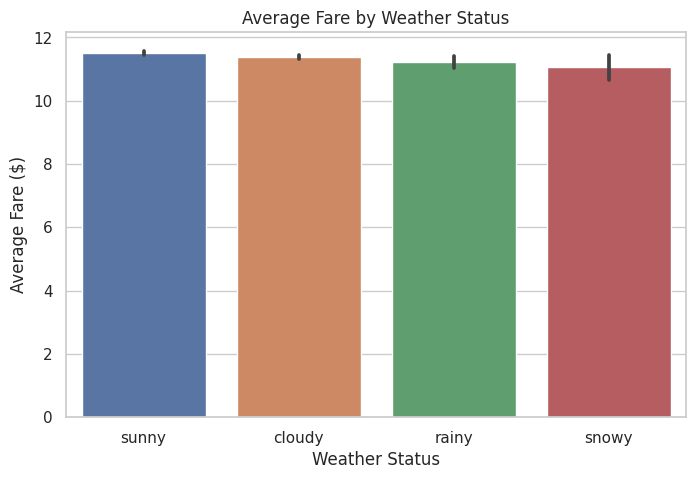

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_merged, x='weather_status', y='fare_amount', estimator='mean')
plt.title('Average Fare by Weather Status')
plt.xlabel('Weather Status')
plt.ylabel('Average Fare ($)')
plt.show()


## Observation so far:
There were features like Pickup and dropoff longitude,latitude at first and found out that invalid coordinates were also there.So I removed them.Then calculated trip distance using haversine function which turned out to be the most important feature to predict uber fare.Then merged another data set (weather.csv) to this dataset .Lastly tried to show relation between target variable and the most important features.It was a bit difficult to adjust the time events. 